In [ ]:
!pip install transformers
!pip install seaborn

In [2]:
import torch
import torch.nn as nn
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
DEVICE

device(type='cpu')

In [ ]:
"""
# Importing the libraries needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import transformers
import json
# from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
# from transformers import RobertaModel, RobertaTokenizer, RobertaForSequenceClassification, AdamW
from transformers import RobertaModel, AdamW
from transformers import get_linear_schedule_with_warmup
from transformers.optimization import AdamW
from sys import platform
import os
import logging
logging.basicConfig(level=logging.ERROR)
""""""

In [3]:
# Importing the libraries needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import transformers
import json
# from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
# from transformers import RobertaModel, RobertaTokenizer, RobertaForSequenceClassification, AdamW
from transformers import RobertaModel, AdamW
from transformers import get_linear_schedule_with_warmup
from transformers.optimization import AdamW
from sys import platform
import os
import logging
logging.basicConfig(level=logging.ERROR)

2022-06-14 18:54:06.978135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 18:54:06.978166: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
from transformers import (
    BertForSequenceClassification, 
    AlbertForSequenceClassification, 
    XLNetForSequenceClassification, 
    RobertaForSequenceClassification, 
    AutoTokenizer
)

In [5]:
max_seq_len = 128

In [5]:
import torch
bert = RobertaForSequenceClassification.from_pretrained('roberta-base', output_hidden_states=True, num_labels = 2)
tokenizer_bert = AutoTokenizer.from_pretrained('roberta-base', do_lower_case=False)
PATHModel = 'Model/output/Roberta/Roberta-base/model-roberta-base.pth'
Pathtok = 'Model/output/Roberta/Roberta-base/tokenizer-roberta-base.pth'
torch.save(bert, PATHModel)
torch.save(tokenizer_bert, Pathtok)


"\nimport torch\nbert = RobertaForSequenceClassification.from_pretrained('roberta-base', output_hidden_states=True, num_labels = 2)\ntokenizer_bert = AutoTokenizer.from_pretrained('roberta-base', do_lower_case=False)\nPATHModel = 'Model/output/Roberta/Roberta-base/model-roberta-base.pth'\nPathtok = 'Model/output/Roberta/Roberta-base/tokenizer-roberta-base.pth'\ntorch.save(bert, PATHModel)\ntorch.save(tokenizer_bert, Pathtok)\n"

In [28]:
class RobertModel(nn.Module):
    def __init__(self, requires_grad = True):
        super(RobertModel, self).__init__()
        # config = RobertaForSequenceClassification.from_pretrained( 'roberta-base', output_hidden_states=True, num_labels = 2)    
        # self.bert = RobertaForSequenceClassification.from_pretrained('roberta-base', output_hidden_states=True, num_labels = 2)
        # self.tokenizer = AutoTokenizer.from_pretrained('roberta-base', do_lower_case=False)
        self.bert = torch.load("Model/output/Roberta/Roberta-base/model-roberta-base.pth.tar",map_location=device)
        self.tokenizer = torch.load('Model/output/Roberta/Roberta-base/tokenizer-roberta-base.pth',map_location=device)
        self.requires_grad = requires_grad
        self.device = torch.device("cuda")
        for param in self.bert.parameters():
            param.requires_grad = requires_grad  # Each parameter requires gradient

    def forward(self, batch_seqs, batch_seq_masks, batch_seq_segments, labels = None):

        loss, logits = self.bert(input_ids = batch_seqs, attention_mask = batch_seq_masks, 
                                  token_type_ids=batch_seq_segments, labels = labels)[:2]
        # print(logits)
        probabilities = nn.functional.softmax(logits, dim=-1)
        return loss, logits, probabilities

In [29]:
import time
from tqdm import tqdm
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report
)  

In [30]:
device = torch.device("cpu")
device

device(type='cpu')

In [31]:
torch.__version__

'1.11.0+cpu'

In [8]:
torch.__version__

'1.8.2+cu102'

In [32]:
PATH = 'Model/output/Roberta/roberta-model2.pth.tar'
model = RobertModel(requires_grad = True)
model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))
model = model.eval()

In [24]:
tokenizer = torch.load('Model/output/Roberta/Roberta-base/tokenizer-roberta-base.pth', map_location=torch.device('cpu'))

In [26]:
PATH = 'Model/output/Roberta/best.state_dict.pth.tar'
# tokenizer = torch.load()
# PATH = 'Model/output/Roberta/roberta-model2.pth'
model = RobertModel(requires_grad = True)
# model = torch.load(PATH)

model.load_state_dict(torch.load(PATH, map_location=device))

checkpoint = torch.load(PATH)
# model2.to(device)
model2.load_state_dict(checkpoint['model'])
model2 = model2.eval()

RuntimeError: [enforce fail at inline_container.cc:145] . PytorchStreamReader failed reading zip archive: failed finding central directory

In [18]:
model = tokenizer
tokenizer = torch.load('Model/output/Roberta/Roberta-base/tokenizer-roberta-base.pth')

In [22]:
model = model.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [34]:
encoding = tokenizer("I'm the best", 
                     pad_to_max_length=True,
                     truncation=True,
                     max_length= 10 ,
                     return_tensors='pt',
                     return_token_type_ids= True)

In [35]:
input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']
token_type_ids = encoding['token_type_ids']
labels = torch.tensor([1])

In [36]:
loss, logits, probabilities = model(input_ids,attention_mask,token_type_ids, labels=labels)
probabilities

tensor([[0.2753, 0.7247]], grad_fn=<SoftmaxBackward0>)

In [ ]:
# PATH = 'Model/output/Roberta/roberta-large_acc98.5300.pth'
# PATH = 'Model/output/Roberta/roberta-summerized.pth'
PATH = 'Model/output/Roberta/roberta-model2.pth'

model.load_state_dict(torch.load(PATH, map_location=device))
model2 = RobertModel(requires_grad = True)
checkpoint = torch.load(PATH)
# model2.to(device)
model2.load_state_dict(checkpoint['model'])
model2 = model2.eval()

NameError: name 'model' is not defined

In [ ]:
# PATH = 'Model/output/Roberta/roberta-large_acc98.5300.pth'
# PATH = 'Model/output/Roberta/roberta-summerized.pth'
PATH = 'Model/output/Roberta/roberta-model1.pth'

model1 = RobertModel(requires_grad = True)
checkpoint = torch.load(PATH)
model1.to(device)
model1.load_state_dict(checkpoint['model'])
model1 = model1.eval()

In [ ]:
# PATH = 'Model/output/Roberta/roberta-large_acc98.5300.pth'
# PATH = 'Model/output/Roberta/roberta-summerized.pth'
PATH = 'Model/output/Roberta/roberta-summerized.pth'

model = RobertModel(requires_grad = True)
checkpoint = torch.load(PATH)
# model.to(device)
model.load_state_dict(checkpoint['model'])
model = model.eval()

In [ ]:
PATH = 'Model/output/Roberta/roberta-loss-test.pth'

model = RobertModel(requires_grad = True)
checkpoint = torch.load(PATH)
model.to(device)
model.load_state_dict(checkpoint['model'])
model = model.eval()

In [ ]:
for i in checkpoint:
    print(i)

epoch
model
optimizer
tokenizer
best_score
epochs_count
train_losses
train_accuracy
valid_losses
valid_accuracy
valid_auc
epoch_times


In [ ]:
checkpoint['epoch_times'],checkpoint['train_losses'],checkpoint['train_accuracy'],checkpoint['valid_losses'],checkpoint['valid_accuracy']

([1089.6042909622192, 1088.863294839859],
 [0.6909487224000646, 0.10974822881342923, 0.027955373397272953],
 [0.5415794012566219, 0.9496160637293146, 0.9859154929577465],
 [0.6909487224000646, 0.03481446524191002, 0.030145805955991218],
 [0.5415794012566219, 0.9783171122335839, 0.98423062707897])

In [ ]:
len(checkpoint['train_accuracy']), len(checkpoint['val_loss_list'])
trainf_len = [i for i in range(len(checkpoint['train_loss_list']))]
val_len = [i for i in range(len(checkpoint['val_loss_list']))]

12

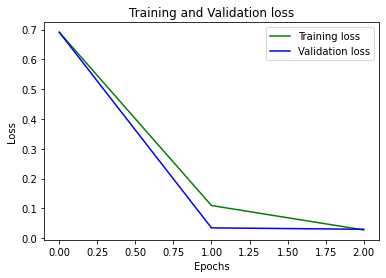

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

loss_train = checkpoint['train_losses']
loss_val = checkpoint['valid_losses']
# epochs = checkpoint['epochs_count']
epochs = [0,1,2]
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

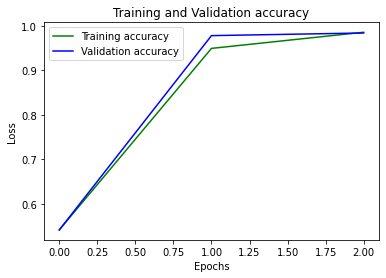

In [ ]:
# !pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

loss_train = checkpoint['train_accuracy']
loss_val = checkpoint['valid_accuracy']
# epochs = checkpoint['epochs_count']
epochs = [0,1,2]
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

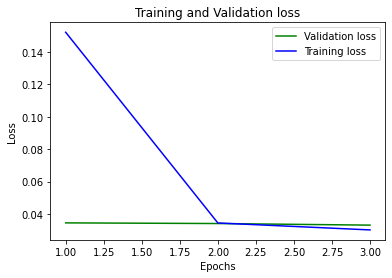

In [ ]:
loss_train = checkpoint['valid_losses']
loss_val = checkpoint['train_losses']
epochs = checkpoint['epochs_count']
plt.plot(epochs, loss_train, 'g', label='Validation loss')
plt.plot(epochs, loss_val, 'b', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_train

[0.9549952777891841, 0.9852995524165401]

In [ ]:
PATH = 'Model/output/Roberta/roberta-large_acc98.5300.pth'

model1 = RobertModel(requires_grad = True)
checkpoint1 = torch.load(PATH)
model1.to(device)
model1.load_state_dict(checkpoint1['model'])
model1 = model1.eval()

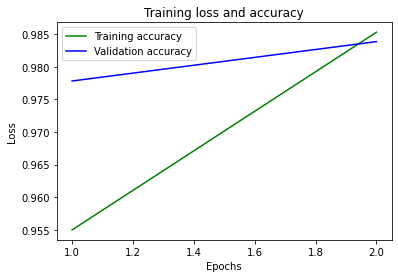

In [ ]:
loss_train = checkpoint1['train_accuracy']
loss_val = checkpoint1['valid_accuracy']
epochs = checkpoint1['epochs_count']
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
tokenizer = model1.tokenizer
# tokenizer1 = model1.tokenizer

In [ ]:
df_fake = pd.read_csv('spark/Generated-data/generated_article.csv')
news = df_fake.iloc[12].text

In [ ]:
news = "Donald Trump says the US is preparing its armies for a war against Russia's aggressive attack on Ukraine"
news = """
An Iranian ex-police commander due to be deported from the UK to Rwanda under a controversial scheme says he fears being killed by Iranian agents there.

The man previously gave testimony to a UK-based rights groups' tribunal investigating alleged Iranian atrocities during protests in 2019.

He has been held at a detention centre near Gatwick Airport after arriving in the UK from Turkey in May.

The first asylum seekers are set to be deported under the scheme on Tuesday.

Their applications will be processed in Rwanda, where they will be given accommodation and help. If successful, they will be able to remain in Rwanda with up to five years' access to education and support.

However the plan has been criticised by politicians and charities, who have raised concerns about the African nation's human rights record.

The former commander, who is not being named in order to protect his identity, was sentenced by an Iranian military court to almost five years in jail in Iran and a demotion for refusing to shoot protesters during anti-government demonstrations triggered by a sharp rise in petrol prices. The former commander was in charge of 60 police officers at the time.
"""

In [ ]:
news = 'Illinois high school to implement race-based grading system in 2022-2023 school year'

In [ ]:
with open('news.txt') as f:
    news = f.read()
news

'President Joe Biden and his administration are once again revisiting the idea of student loan forgiveness, a controversial idea that could allow for some – or even all – student debt to be erased.While some have pushed for debt forgiveness, seeing it as a potential injection of money into the economy, others – including U.S. Rep. Glenn Grothman, R-Wisconsin – have questioned the idea.\n"Nearly 60% of all student loan debt is held by the rich and upper-middle class," he said in a May 21, 2022 newsletter. "So, by forgiving student loan debt, we would be handing the wealthy a financial windfall while low income Americans suffer further from inflation and rising costs." \nFor the purposes of this fact-check, we’re going to look at the portion of the claim about who holds student loan debt, and whether or not forgiveness would help low-income people. \nWealthier majors tend to make more money after college, spend more on degrees \nWhen asked for backup for the claim, Grothman’s office shar

In [ ]:
news = "Capitol riot hearing: Trump dismisses daughter Ivanka's testimony'"

In [ ]:
test = len(news.split())
if test <= 512:
    max_len = test
else:
    max_len = 512
test

635

In [ ]:
encoding = tokenizer(news, 
                     pad_to_max_length=True,
                     truncation=True,
                     max_length= max_len ,
                     return_tensors='pt',
                     return_token_type_ids= True)

In [ ]:
for i in encoding:
    print(i)

input_ids
token_type_ids
attention_mask


In [ ]:

input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']
token_type_ids = encoding['token_type_ids']
labels = torch.tensor([1])


In [ ]:
model1 = model1.to(device)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)
token_type_ids = encoding['token_type_ids'].to(device)
labels = torch.tensor([1]).to(device)

In [ ]:
news

'President Joe Biden and his administration are once again revisiting the idea of student loan forgiveness, a controversial idea that could allow for some – or even all – student debt to be erased.While some have pushed for debt forgiveness, seeing it as a potential injection of money into the economy, others – including U.S. Rep. Glenn Grothman, R-Wisconsin – have questioned the idea.\n"Nearly 60% of all student loan debt is held by the rich and upper-middle class," he said in a May 21, 2022 newsletter. "So, by forgiving student loan debt, we would be handing the wealthy a financial windfall while low income Americans suffer further from inflation and rising costs." \nFor the purposes of this fact-check, we’re going to look at the portion of the claim about who holds student loan debt, and whether or not forgiveness would help low-income people. \nWealthier majors tend to make more money after college, spend more on degrees \nWhen asked for backup for the claim, Grothman’s office shar

In [ ]:
loss, logits, probabilities = model1(input_ids,attention_mask,token_type_ids, labels=labels)

RuntimeError: CUDA out of memory. Tried to allocate 12.00 MiB (GPU 0; 15.75 GiB total capacity; 1.96 GiB already allocated; 12.31 MiB free; 2.06 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
loss, logits, probabilities1 = model1(input_ids,attention_mask,token_type_ids, labels=labels)

In [ ]:
fake_prob = probabilities[0][0].item()
real_prob = probabilities[0][1].item()
if real_prob >= 0.5:
    print('This article is: Real')
else:
    print('This article is: Fake')

NameError: name 'probabilities' is not defined

In [ ]:
probabilities

tensor([[0.0070, 0.9930]], grad_fn=<SoftmaxBackward0>)

In [ ]:
"""
from zipfile import ZipFile

with ZipFile('Datasets/Fake.zip', 'r') as zipObj:
    # Extract all the contents of zip file in different directory
    zipObj.extractall('Datasets')
    print('File is unzipped in Datasets folder') 
"""

File is unzipped in Datasets folder


In [ ]:
import pandas as pd
df = pd.read_csv('spark/news_for_generation.csv')
c = 0
list = []
for t in df.description:
    try:
        if len(t.split()) > 10:
            c += 1
            list.append(len(t.split()))
    except:
        pass
len(list), max(list)

(6105, 226)

In [ ]:
df = pd.read_csv('Politi Fact/politifact_data.csv')
df_fake = df.loc[df.target == 'false']
df_barely_true= df.loc[df.target == 'barely-true']
df_pants_fire= df.loc[df.target == 'pants-fire']
df_fake = pd.merge(df_fake,df_barely_true,how= 'outer')
df_fake = pd.merge(df_fake,df_pants_fire,how= 'outer')
df_fake.loc[df_fake.target == 'barely-true']

,author,statement,source,date,target
5539,Analisa Trofimuk,"""We need to realize that people who think that...",Greg Abbott,"June 3, 2022",barely-true
5540,Analisa Trofimuk,"""We need to realize that people who think that...",Greg Abbott,"June 3, 2022",barely-true
5541,Maria Ramirez,Increased encounters at the southwest border i...,Mark Brnovich,"• June 2,",barely-true
5542,Maria Ramirez,Increased encounters at the southwest border i...,Mark Brnovich,"• June 2,",barely-true
5543,D.L. Davis,In the immediate wake of a fire and vandalism ...,Ron Johnson,"May 31, 2022",barely-true
...,...,...,...,...,...
8907,Angie Drobnic,"""No, I did not (have illegal immigrants workin...",Mitt Romney,"• May 30,",barely-true
8908,Angie Drobnic,"""Gov. Romney's own health care plan in Massach...",Fred Thompson,"• May 23,",barely-true
8909,Alexander Lane,"Obama says his health care plan is ""universal.""",Barack Obama,"May 21, 2008",barely-true
8910,Robert Farley,"""People were hopeless. Sixty percent of the po...",Rudy Giuliani,"May 19, 2008",barely-true


In [ ]:
# df = pd.read_csv('Datasets/Real_news_for_test.csv').head(2000)
df = pd.read_csv('Datasets/HuggingFaceDataset/GonzaloA-fake_news/test.csv')
df = df.loc[df.label == 1]
df = df
# df = df.dropna()

"""
df_real = df.loc[df.target == 'true']
df_mostly_true= df.loc[df.target == 'mostly-true']
df_real = pd.merge(df_real,df_mostly_true,how= 'outer')
df_real
"""
df
# d = df_fake.loc[target.Prediction == 0]

,index,title,text,label
3,3,Nepal votes in final round of polls at the end...,Nepal votes in final round of polls at the end...,1
4,4,"More Americans think wealthy, not middle class...","More Americans think wealthy, not middle class...",1
5,5,Average of polls puts New Zealand's ruling Nat...,Average of polls puts New Zealand's ruling Nat...,1
6,6,Russia probe counsel wants to interview senior...,Russia probe counsel wants to interview senior...,1
7,7,London's Canary Wharf Docklands Light Railway ...,London's Canary Wharf Docklands Light Railway ...,1
...,...,...,...,...
3777,3777,Energy market affected decision on Atlantic dr...,Energy market affected decision on Atlantic dr...,1
3778,3778,Factbox: Price resignation is latest Trump adm...,Factbox: Price resignation is latest Trump adm...,1
3781,3781,U.S. to propose Obama visit Hiroshima in late ...,U.S. to propose Obama visit Hiroshima in late ...,1
3782,3782,London sky turns yellow as storm blows in Saha...,London sky turns yellow as storm blows in Saha...,1


In [ ]:
def test_model(model1, tokenizer, df,list):
    model = model1.to(device)
    for text in df.title:
        d = {}
        test = len(text.split())
        if test <= 512:
            max_len = test
        else:
            max_len = 512
        encoding = tokenizer(text, 
                         pad_to_max_length=True,
                         truncation=True,
                         max_length= max_len ,
                         return_tensors='pt',
                         return_token_type_ids= True)
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)
        token_type_ids = encoding['token_type_ids'].to(device)
        labels = torch.tensor([1]).to(device)
        _, _, probabilities = model(input_ids,attention_mask,token_type_ids, labels=labels)
        fake_prob = probabilities[0][0].item()
        real_prob = probabilities[0][1].item()
        if real_prob >= 0.5:
            pred = 1
        else:
            pred = 0
        d['Fake_pred'] = fake_prob
        d['Real_pred'] = real_prob
        d['Prediction'] = pred
        list.append(d)
    return list

In [ ]:
%%time
list = []
list = test_model(model1, tokenizer1, df,list)

/opt/conda/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2285: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


CPU times: user 24.9 s, sys: 62.3 ms, total: 25 s
Wall time: 25 s


In [ ]:
%%time
list1 = []
list1 = test_model(model, tokenizer, df,list1)

CPU times: user 24.8 s, sys: 21.2 ms, total: 24.8 s
Wall time: 24.8 s


In [ ]:
pd.DataFrame(list).to_csv('Datasets/model1-pred_politifact_BBC.csv', index=False)

In [ ]:
df_model1 = pd.DataFrame(list)

In [ ]:
df_model2 = pd.DataFrame(list1)

In [ ]:
df_model1 = pd.read_csv('Datasets/model1-pred_politifact_fake_most11536.csv')
df_model2 = pd.read_csv('Datasets/model2-pred_politifact_fake_most11536.csv')

In [ ]:
df_model1

,Fake_pred,Real_pred,Prediction
0,0.000537,0.999463,1
1,0.004603,0.995396,1
2,0.152706,0.847294,1
3,0.014871,0.985129,1
4,0.446234,0.553766,1
...,...,...,...
1995,0.000560,0.999440,1
1996,0.993765,0.006235,0
1997,0.014770,0.985230,1
1998,0.897066,0.102934,0


In [ ]:
#df_plot = pd.read_csv('Datasets/model2-pred_text.csv')
d = df_model1.loc[df_model1.Prediction == 0]
d1 = df_model1.loc[df_model1.Prediction == 1]
print('Model 01:')
('Fake',len(d)), ('Real',len(d1)), ('Correct Pred', len(d1))

Model 01:


(('Fake', 381), ('Real', 1619), ('Correct Pred', 1619))

In [ ]:
#df_plot = pd.read_csv('Datasets/model2-pred_text.csv')
d2 = df_model2.loc[df_model2.Prediction == 0]
d3 = df_model2.loc[df_model2.Prediction == 1]
print('Model 02:')
('Fake',len(d2)), ('Real',len(d3)), ('Correct Pred', len(d3))

Model 02:


(('Fake', 111), ('Real', 1889), ('Correct Pred', 1889))

In [ ]:
#df_plot = pd.read_csv('Datasets/model2-pred_text.csv')
d = df_model1.loc[df_model1.Prediction == 0]
d1 = df_model1.loc[df_model1.Prediction == 1]
print('Model 01:')
('Fake',len(d)), ('Real',len(d1)), ('Correct Pred', len(d1))

Model 01:


(('Fake', 2163), ('Real', 2448), ('Correct Pred', 2448))

In [ ]:
#df_plot = pd.read_csv('Datasets/model2-pred_text.csv')
d2 = df_model2.loc[df_model2.Prediction == 0]
d3 = df_model2.loc[df_model2.Prediction == 1]
print('Model 02:')
('Fake',len(d2)), ('Real',len(d3)), ('Correct Pred', len(d3))

Model 02:


(('Fake', 1651), ('Real', 2960), ('Correct Pred', 2960))

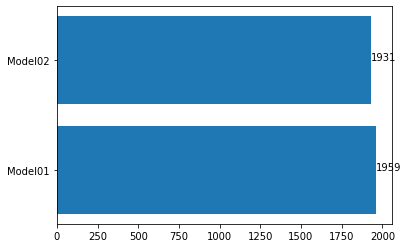

In [ ]:
import matplotlib.pyplot as plt
x = ['Model01', 'Model02']
y = [len(d1), len(d3)]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

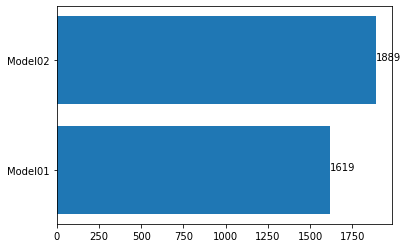

In [ ]:
import matplotlib.pyplot as plt
x = ['Model01', 'Model02']
y = [len(d1), len(d3)]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

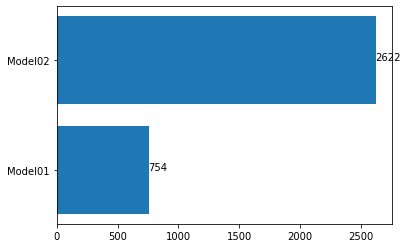

In [ ]:
import matplotlib.pyplot as plt
x = ['Model01','Model02']
y = [len(d1), len(d3)]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

<AxesSubplot:ylabel='Frequency'>

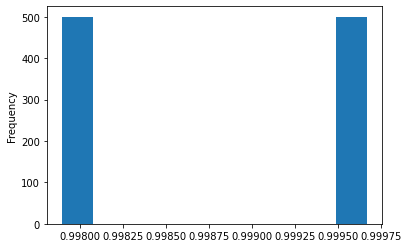

In [ ]:
# df_plot.plot(x=[0,1,2,3], y=["Real_pred", "Fake_pred"])
import matplotlib.pyplot as plt

# plt.plot(df_plot["Real_pred"], df_plot["Fake_pred"])
median_column = df_plot["Fake_pred"]
median_column.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

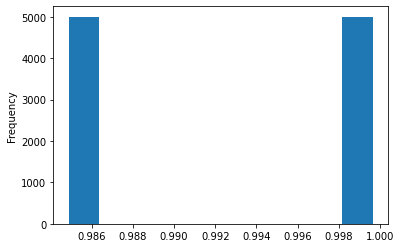

In [ ]:
df_plot[df_plot["Prediction"] == 0]["Fake_pred"].plot(kind="hist")

In [ ]:
# test NYT Apis
import requests
link = 'https://api.nytimes.com/svc/archive/v1/2019/1.json?api-key='
api_key = '1tgiSpMocgV00Nq8gav3OG9dXiLYgMHt'
# https://api.nytimes.com/svc/archive/v1/{year}/{month}.json

year_month = f'/{2020}/{5}.json'
url = link + api_key
resp = requests.get(url)

print(resp.status_code)

200


In [ ]:
# Demo code sample. Not indended for production use.

# See instructions for installing Requests module for Python
# https://requests.readthedocs.io/en/master/user/install/#install

import requests
api_key = '1tgiSpMocgV00Nq8gav3OG9dXiLYgMHt'

def execute(api_key,list,i):
    year = 2010 + i
    print('Year: ', year)
    for j in range(1,13):
        month = i
        requestUrl = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}"
        requestHeaders = {
        "Accept": "application/json"
        }

        response = requests.get(requestUrl, headers=requestHeaders)
        statement = response.json()
        try:
            articles = statement['response']['docs']
            for article in articles:
                d = {}
                web_url = article['web_url']
                source = article['source']
                headline = article['headline']['main']
                lead_paragraph = article['lead_paragraph']
                d['source'] = source
                d['title'] = headline
                d['description'] = lead_paragraph
                d['web_url'] = web_url
                list.append(d)
            print(len(articles))
        except:
            pass
    

if __name__ == "__main__":
    list = []
    n = 13
    for i in range(1,22):
        execute(api_key,list,i)

Year:  2011
8478
8478
8478
8478
8478
8478
8478
8478
8478
8478
Year:  2012
Year:  2013
Year:  2014
Year:  2015
Year:  2016
Year:  2017
4757
4757
4757
4757
4757
4757
4757
Year:  2018
6381
6381
6381
Year:  2019
Year:  2020
Year:  2021
Year:  2022
Year:  2023
Year:  2024
Year:  2025
Year:  2026
Year:  2027
Year:  2028
Year:  2029
Year:  2030
Year:  2031


In [ ]:
len(list)

137222

In [ ]:
pd.DataFrame(list).to_csv('Datasets/NYW.csv', index=False)

In [ ]:
%%time
from bs4 import BeautifulSoup as bs
import requests
list = []
for i in range(1,30):
    url = "https://www.bbc.co.uk/search?q=Business&page=" + str(i)
    r = requests.get(url)
    soup = bs(r.content, 'html.parser')
    lis = soup.find('ul',{'class':'ssrcss-1020bd1-Stack e1y4nx260'}).find_all('li')
    try:
        for li in lis:
            d = {}
            div_content = li.find('div',{'class':'ssrcss-1f3bvyz-Stack e1y4nx260'})
            title = div_content.find('a').text.strip()
            description = div_content.find('p',{'class':'ssrcss-1q0x1qg-Paragraph eq5iqo00'}).text.strip()
            link = div_content.find('a').get('href')
            r = requests.get(link)
            soup = bs(r.content, 'html.parser')
            div_list = soup.find_all('div',{'class':'ssrcss-uf6wea-RichTextComponentWrapper e1xue1i86'})
            text = ''
            for t in div_list:
                text = text + t.text.strip() + ' '
            if str(type(i)) != "<class 'float'>":
                d['title'] = title
                d['description'] = description
                d['text'] = text
                d['link'] = link
                list.append(d)
    except:
        pass
        

CPU times: user 13.4 s, sys: 353 ms, total: 13.8 s
Wall time: 3min 20s


In [ ]:
pd.DataFrame(list).to_csv('Datasets/BBC-Business.csv', index=False)

In [ ]:
df = pd.read_csv('Datasets/HuggingFaceDataset/cc_news/Real_news.csv')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (0,1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_non = df.dropna()
df_non

,index,title,text,description
0,0,Daughter Duo is Dancing in The Same Company,Daughter Duo is Dancing in The Same Company\n\...,There's a surprising twist to Regina Willoughb...
1,1,New York City Ballet Announces Interim Leaders...,New York City Ballet Announces Interim Leaders...,NYCB has announced an interim leadership team ...
2,2,Watch Pennsylvania Ballet & Boston Ballet Face...,Watch Pennsylvania Ballet & Boston Ballet Face...,The Philadelphia Eagles and the New England Pa...
3,3,dance shoes,dance shoes\n\n\nLooking for your next auditio...,Looking for your next audition shoe? Shot at a...
4,4,Rebecca Krohn on Her Retirement from New York ...,Rebecca Krohn on Her Retirement from New York ...,We interviewed New York City Ballet principal ...
...,...,...,...,...
1065432,708233,East Midlands residents ‘illegally stream and ...,East Midlands residents ‘illegally stream and ...,A brand new study undertaken by a broadband co...
1065433,708234,Musical maverick opens Jockey Club Live season...,Musical maverick opens Jockey Club Live season...,Excitement is growing ahead of the opening Joc...
1065434,708235,LINCS LEAGUE: Fixtures,LINCS LEAGUE: Fixtures\n\n\nToday’s matches......,Today’s matches...
1065435,708236,Louth police investigate Boyes theft,Louth police investigate Boyes theft\n\n\nPoli...,Police are appealing for information that coul...


In [ ]:
# df_test = df.loc[len(df['text']) > 450]
df_t = df.head(500)
list = []
c = 0
i = 0
for index, row in df_non.iterrows():
    d = {}
    try:
        text = row.text
        test = text.split()
        title = row.title
        description = row.description
        if len(test) >= 800:
            c += 1   
            d['title'] = title
            d['text'] = text
            d['description'] = description
            list.append(d)
            i += 1
            if i == 20000:
                break
    except:
        pass
    
len(list)

20000

In [ ]:
# df_test = pd.DataFrame(list)
df_test.to_csv('Datasets/Real_news_for_test.csv', index=False)

In [ ]:
df = pd.read_csv('Datasets/Real_news_for_test.csv')
df

,title,description,text,link
0,Russian man accused of Alexander Litvinenko ki...,"Dmitry Kovtun, one of two men the UK says were...",One of the main suspects in the murder of the ...,https://www.bbc.co.uk/news/world-europe-61690519
1,Middlesbrough man let down by care as Covid hi...,New carers took him out for a walk when he sho...,A vulnerable cancer patient who died after con...,https://www.bbc.co.uk/news/uk-england-tees-616...
2,Queen's Honours: Bittersweet award for Covid n...,"Maria Hewitt, who cared for Covid patients aft...",A medal from the Queen to recognise her work d...,https://www.bbc.co.uk/news/uk-scotland-61673162
3,Cancer patient in call for Evusheld Covid medi...,Scott Brigden wants to be able to take Evushel...,A cancer patient shielding from Covid has told...,https://www.bbc.co.uk/news/uk-england-humber-6...
4,Covid: Maskless Tube passengers owe Transport ...,Compulsory masks were reinstated amid rising c...,Passengers owe Transport for London (TfL) an e...,https://www.bbc.co.uk/news/uk-england-london-6...
...,...,...,...,...
20266,Polish PM defends judicial witch-hunt,Poland's judicial purge was meant to punish fo...,Polish PM defends judicial witch-hunt\n\n\nPol...,NaN
20267,North Korea: time to put the 'E' in engagement,Brussels now has a chance to enhance the EU's ...,North Korea: time to put the 'E' in engagement...,NaN
20268,A guide to Dutch elections: how the system works,The Dutch electoral and party system makes it ...,A guide to Dutch elections: how the system wor...,NaN
20269,Italian crisis felt in Spain and wider EU,Collapse of government talks in Rome triggered...,Italian crisis felt in Spain and wider EU\n\n\...,NaN


In [ ]:
c = 0
for i in df.text:
    if str(type(i)) != "<class 'float'>":
        c += 1
    
c

AttributeError: 'DataFrame' object has no attribute 'text'